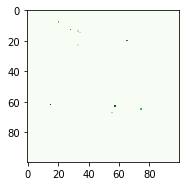

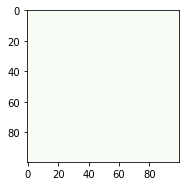

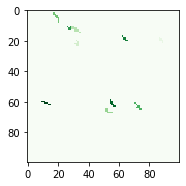

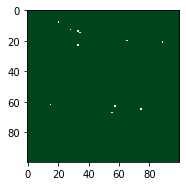

{'world_size': 100,
 'global_creature_id_counter': 11,
 'world_array': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]),
 'carbon_dioxide_map': array([[5, 5, 5, ..., 5, 5, 5],
        [5, 5, 5, ..., 5, 5, 5],
        [5, 5, 5, ..., 5, 5, 5],
        ...,
        [5, 5, 5, ..., 5, 5, 5],
        [5, 5, 5, ..., 5, 5, 5],
        [5, 5, 5, ..., 5, 5, 5]]),
 'plants': [array([[ 1., 21., 88.,  0.,  4.],
         [ 1.,  0.,  0., -1.,  0.],
         [ 0., -1.,  0., -1., -1.],
         [ 0., -1.,  0., -1., -1.],
         [ 0., -1.,  0., -1., -1.],
         [ 0., -1., -1., -1., -2.],
         [ 0., -1., -1., -1., -1.],
         [ 0., -1., -1., -2., -1.],
         [ 0., -1., -1., -2., -1.],
         [ 0., -1., -1., -2., -2.],
         [ 0., -1.,  0., -2., -1.],
         [ 0., -2., -1., -3., -2.],
         [ 0., -1., -1., -2., -2.],
    

In [64]:
%reload_ext autoreload
%autoreload

import numpy as np
import creature_spawning.spawn_creature as sc
import visualization.creature_rendering as creature_render
import visualization.array_rendering as ar

def photosynthesize(world_params):
    # for plant_id in enumerate(world_params['world_array'][np.nonzero(world_params['world_array'])]):
    occupied_squares = np.nonzero(world_params['world_array'])
    for index, x in enumerate(occupied_squares[0]):
        y = occupied_squares[1][index]
        world_params['plants'][int(np.round(world_params['world_array'][x][y])) - 1][0][4] += 1
        world_params['carbon_dioxide_map'][x][y] -= 1

def grow_plants(world_params):
    new_growth = []
    for index, plant in enumerate(world_params['plants']):
        if plant[0][4] > 5:
            plant[0][4] = 0
            joined_seg = plant[np.random.randint(1, len(plant))]
            new_seg = [0, joined_seg[3], joined_seg[4], joined_seg[3] + np.random.randint(-1, 1), joined_seg[4] + np.random.randint(-1, 1)]
            new_growth.append((index, np.append(plant, [new_seg], 0)))

    for index, new_plant in new_growth:
        world_params['plants'][index] = new_plant



world_params = { 'world_size': 100,
                 'global_creature_id_counter': int(1) }

world_params['world_array'] = np.zeros(shape=(world_params['world_size'], world_params['world_size']), dtype=int)

world_params['carbon_dioxide_map'] = np.full(shape=(world_params['world_size'], world_params['world_size']),
                             fill_value=5)

sc.spawn_new_plants(world_params=world_params,
                             num_plants=10)

creature_render.place_creatures(world_params)

ar.render_array(world_params['world_array'])
ar.render_array(world_params['carbon_dioxide_map'])

for i in range(100):
    photosynthesize(world_params)
    grow_plants(world_params)

creature_render.place_creatures(world_params)

ar.render_array(world_params['world_array'])
ar.render_array(world_params['carbon_dioxide_map'])

world_params